# **Iris Flower Classification**

![alt](https://miro.medium.com/v2/resize:fit:828/format:webp/1*nfK3vGZkTa4GrO7yWpcS-Q.png)iv>


## **Project Description:**

The Iris Flower Classification project aims to create a machine learning model for identifying different species of iris flowers based on their unique measurements. Iris flowers, specifically setosa, versicolor, and virginica, display distinct characteristics that can be quantified and used for classification purposes.

## **Objective:**

The primary objective of this project is to utilize machine learning techniques to develop a robust classification model capable of accurately distinguishing between various species of iris flowers using their measurements. The project seeks to automate and streamline the process of iris species identification, providing a practical and efficient solution.

## **Key Project Details:**

- Iris flowers are categorized into three species: setosa, versicolor, and virginica.
Species differentiation is based on measurements including sepal length, sepal width, petal length, and petal width.
- The project entails training a machine learning model using a dataset comprising iris flower measurements and their corresponding species labels.
- Upon training, the model will accurately classify iris flowers into one of the three species based on their measured attributes.

#### Importing Libraries

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as plio
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
from warnings import filterwarnings
filterwarnings(action='ignore')

#### Load and display the dataset:

In [2]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
#Dataframe column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.shape

(150, 6)

In [6]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [9]:
# Dataset Rows & Columns count
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  150
Number of columns are:  6


In [10]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 0


#### Check for Null Values

In [11]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<Axes: >

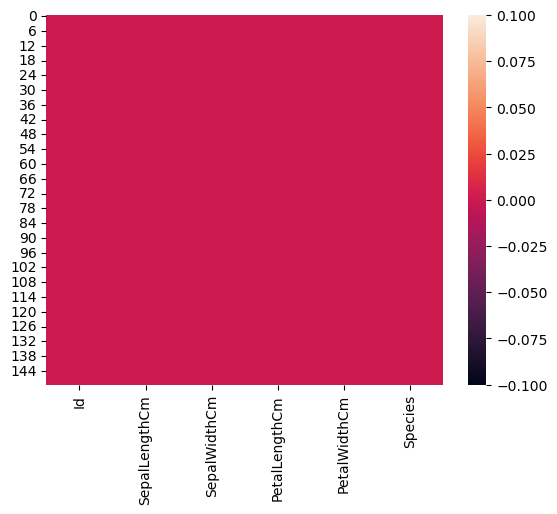

In [12]:
import seaborn as snssns.heatmap(df.isnull())

The consistent heatmap indicates that the dataset is full, with no missing values. This means that data preparation may proceed without the need for imputation of missing data.

In [13]:
duplicate_count = df.duplicated().sum()
print(duplicate_count)

0


#### Conclusion

* The Iris dataset consists of length and width mesurements of sepal and petal for different species in centimeter.
* There are 150 rows and 6 columns provided in the data.
* No duplicate values exist.
* No Null values exist.

## **Data Visualization**

<Axes: ylabel='count'>

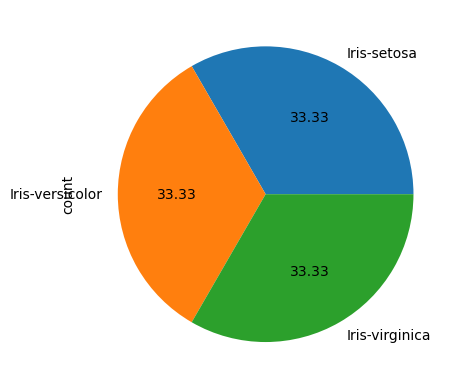

In [16]:
# Visualization in form of pie chart
df['Species'].value_counts().plot(kind='pie',autopct='%.2f')

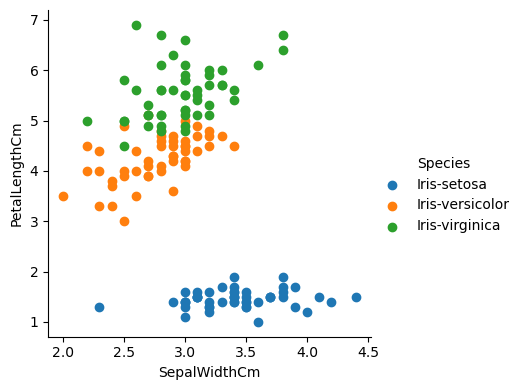

In [18]:
#Scatter Plot to  visualize the datset 
sns.FacetGrid(df,hue='Species',height=4).map(plt.scatter,"SepalWidthCm" , "PetalLengthCm").add_legend()

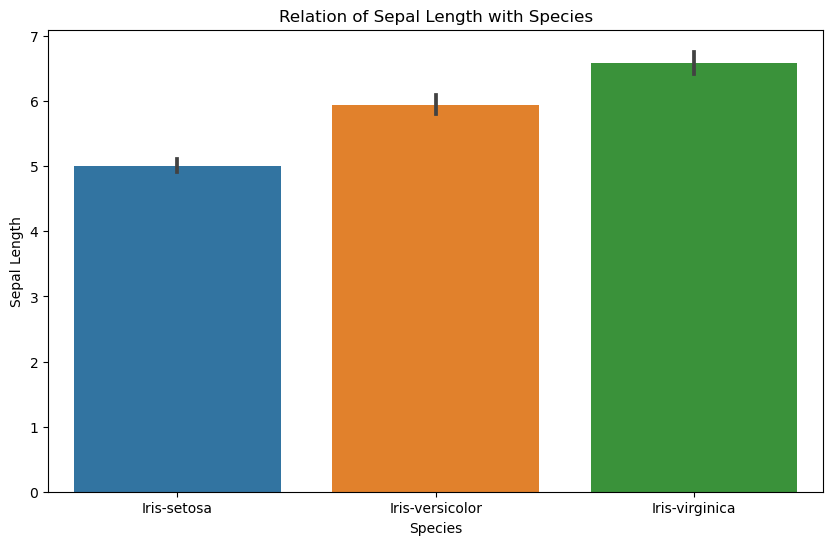

In [24]:
# Plot for Sepal Length
fig = plt.figure(figsize=(10, 6))
sns.barplot(x='Species', y='SepalLengthCm', data=df)
plt.title('Relation of Sepal Length with Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length')
plt.show()

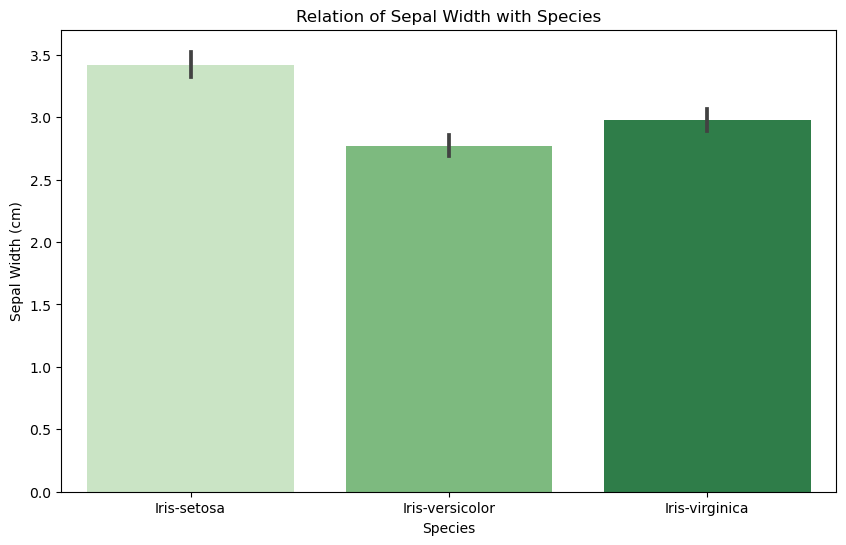

In [30]:
# Plot for Sepal Width
fig = plt.figure(figsize=(10, 6))
sns.barplot(x='Species', y='SepalWidthCm', data=df, palette='Greens')
plt.title('Relation of Sepal Width with Species')
plt.xlabel('Species')
plt.ylabel('Sepal Width (cm)')
plt.show()

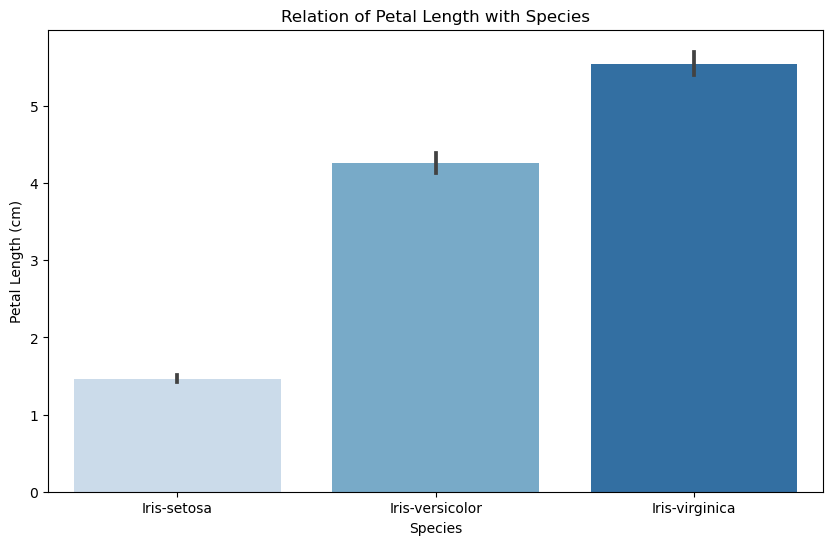

In [32]:
# Plot for Petal Length
fig = plt.figure(figsize=(10, 6))
sns.barplot(x='Species', y='PetalLengthCm', data=df,palette='Blues')
plt.title('Relation of Petal Length with Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.show()

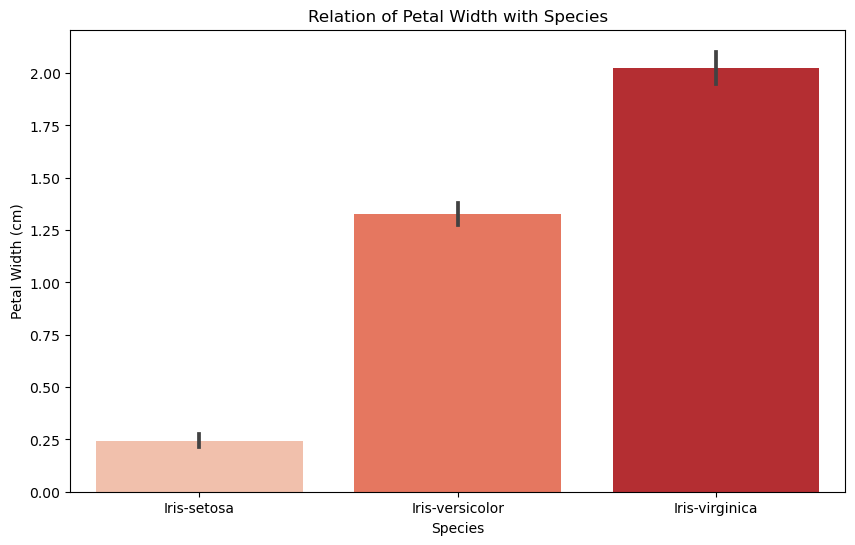

In [34]:
# Plot for Petal Width
fig = plt.figure(figsize=(10, 6))
sns.barplot(x='Species', y='PetalWidthCm', data=df,palette='Reds')
plt.title('Relation of Petal Width with Species')
plt.xlabel('Species')
plt.ylabel('Petal Width (cm)')
plt.show()

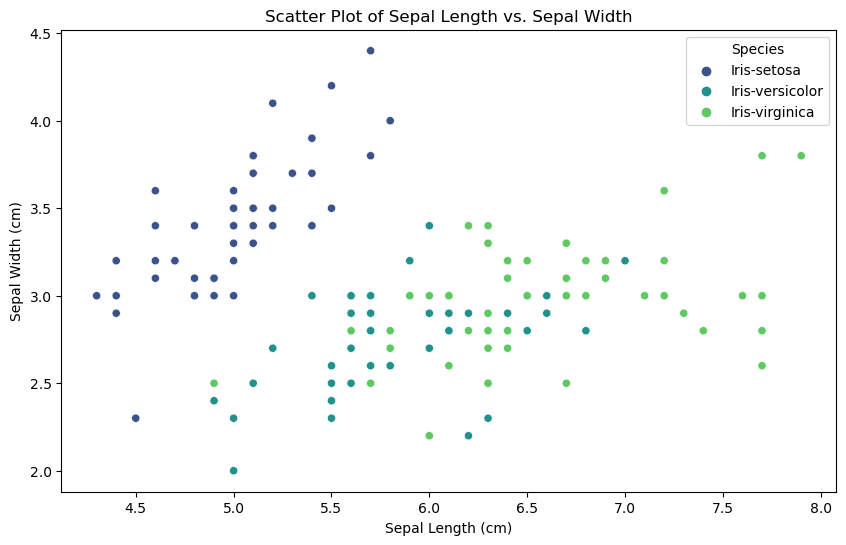

In [42]:
# Scatter plot for Sepal Length vs. Sepal Width
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='SepalLengthCm', y='SepalWidthCm', hue='Species', palette='viridis')
plt.title('Scatter Plot of Sepal Length vs. Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

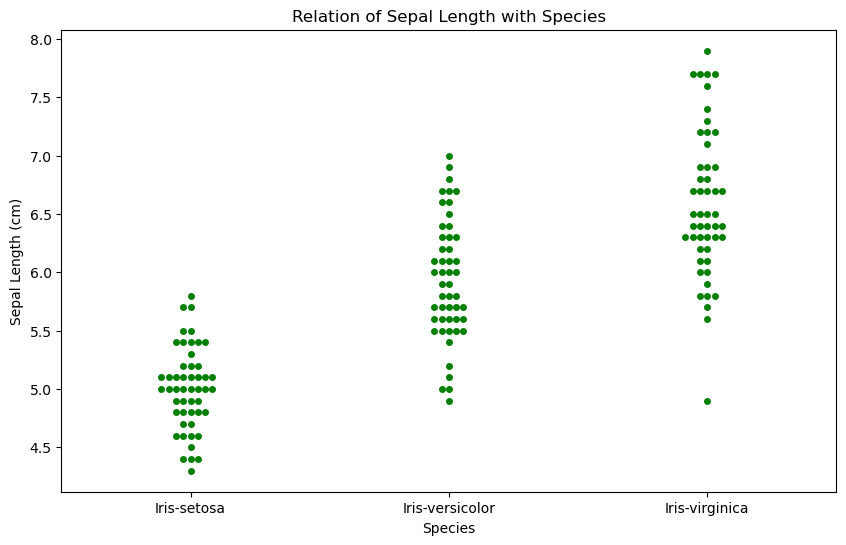

In [37]:
# Scatter plot for Sepal Length
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Species', y='SepalLengthCm', data=df, color='green')
plt.title('Relation of Sepal Length with Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')
plt.show()

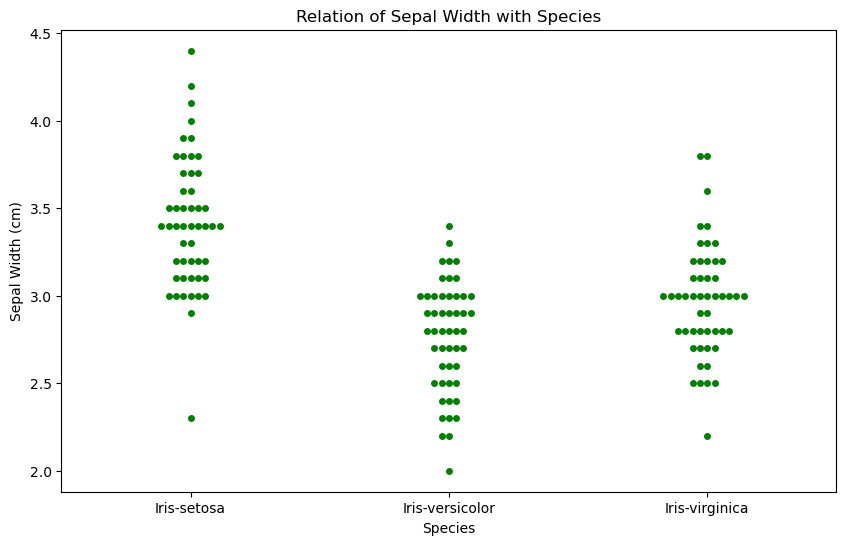

In [38]:
# Swarm plot for Sepal Width
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Species', y='SepalWidthCm', data=df, color='green')
plt.title('Relation of Sepal Width with Species')
plt.xlabel('Species')
plt.ylabel('Sepal Width (cm)')
plt.show()

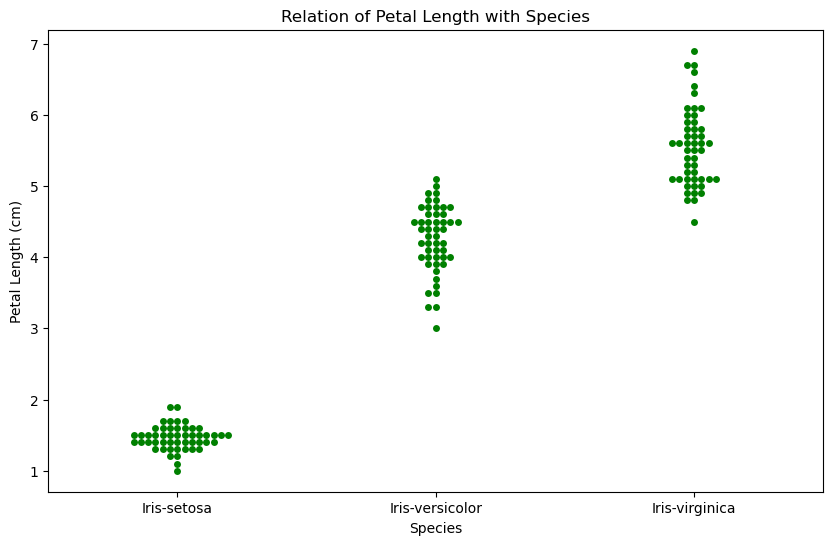

In [39]:
# Swarm plot for Petal Length
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Species', y='PetalLengthCm', data=df, color='green')
plt.title('Relation of Petal Length with Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.show()

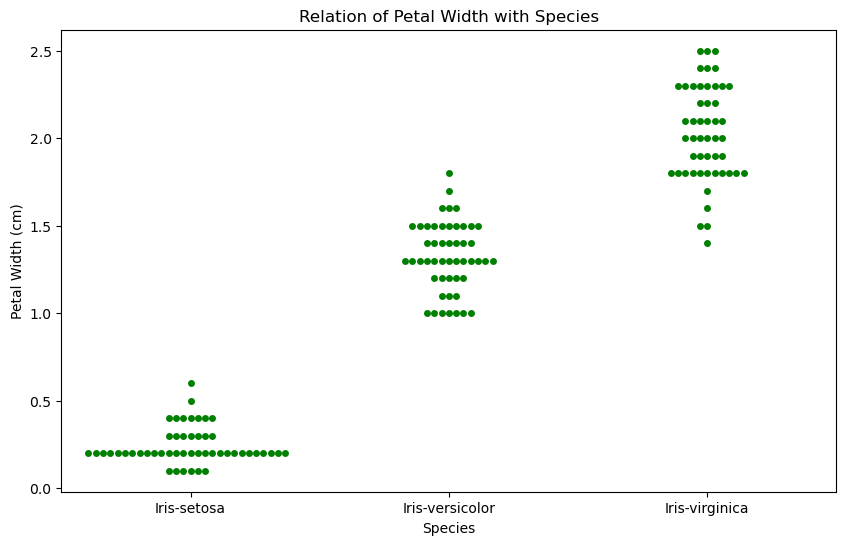

In [40]:
# Swarm plot for Petal Width
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Species', y='PetalWidthCm', data=df, color='green')
plt.title('Relation of Petal Width with Species')
plt.xlabel('Species')
plt.ylabel('Petal Width (cm)')
plt.show()

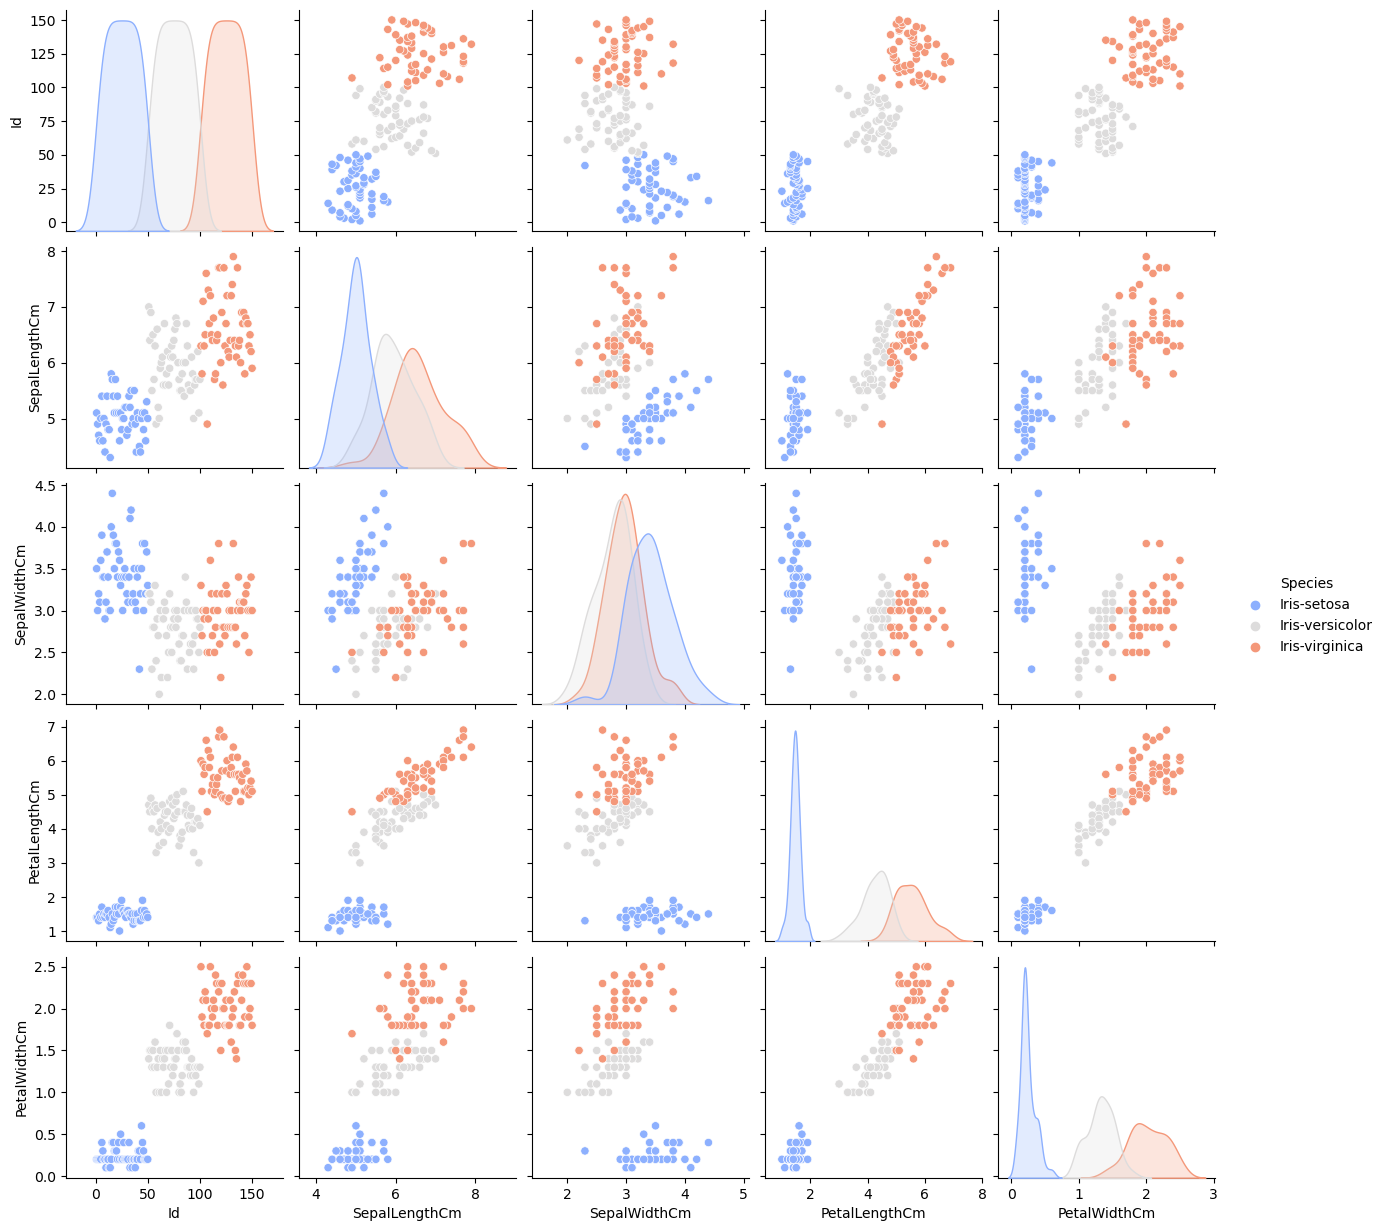

In [41]:
# Pairplot of the Iris dataset
sns.pairplot(df, hue='Species', palette='coolwarm')
plt.show()

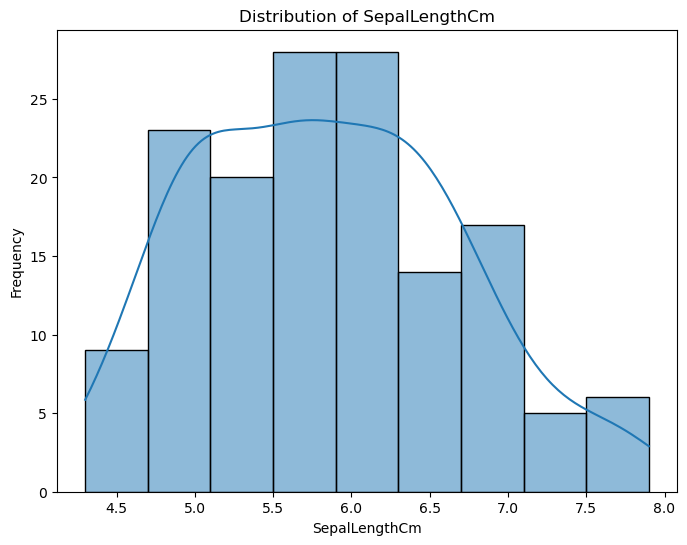

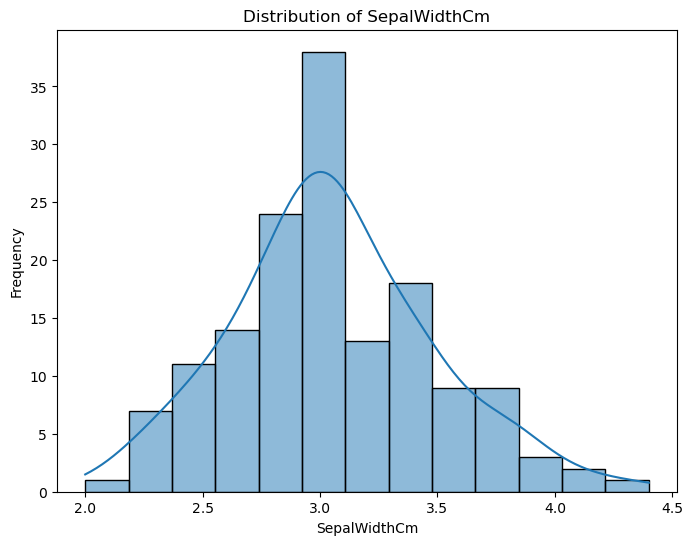

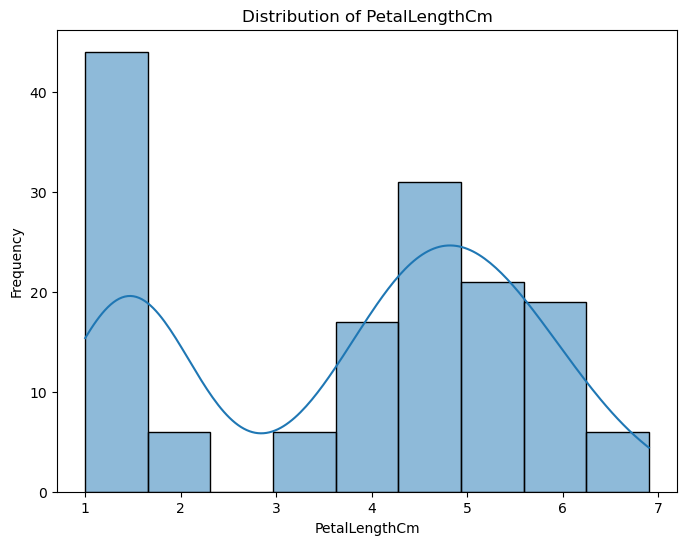

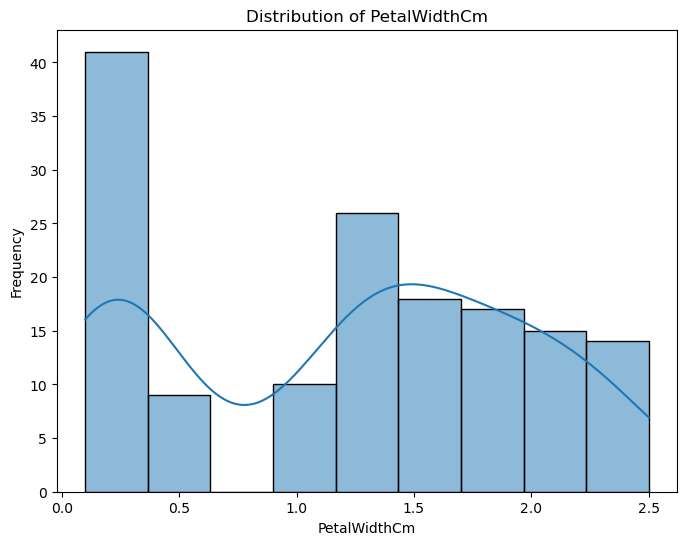

In [44]:
num = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

for i, col in enumerate(num):
    plt.figure(figsize=(8, 6))  
    sns.histplot(df[col], kde=True)  
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

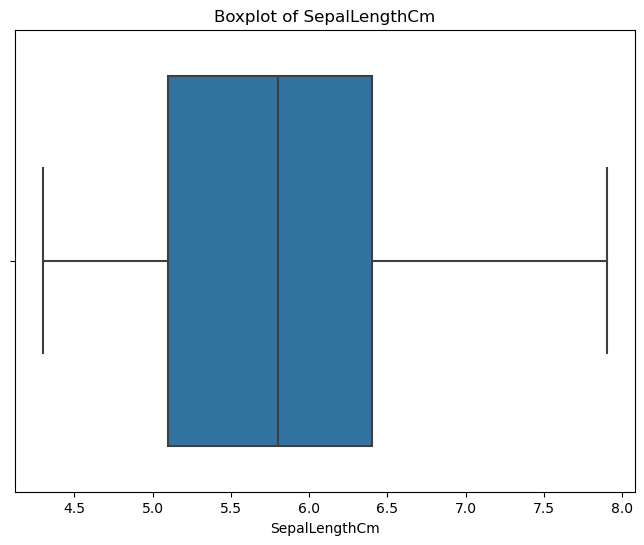

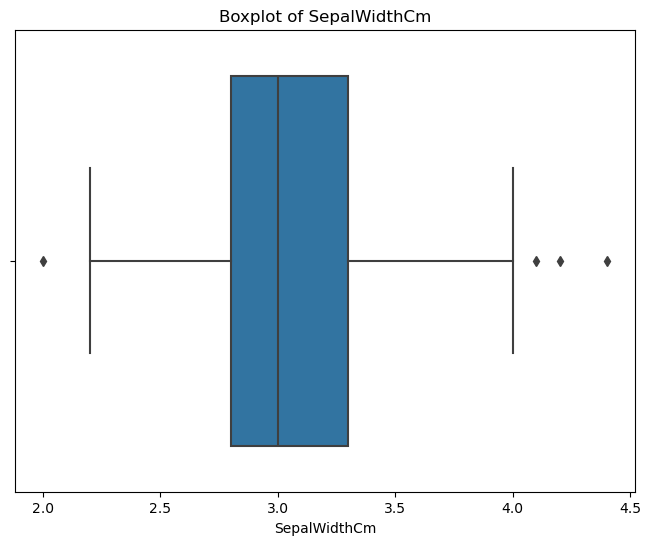

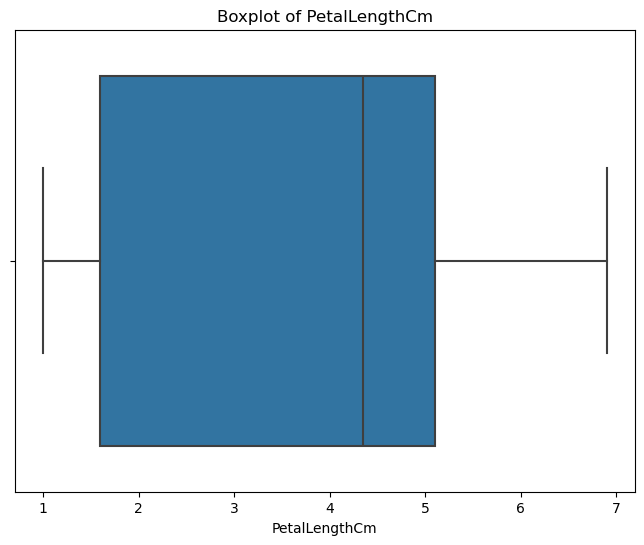

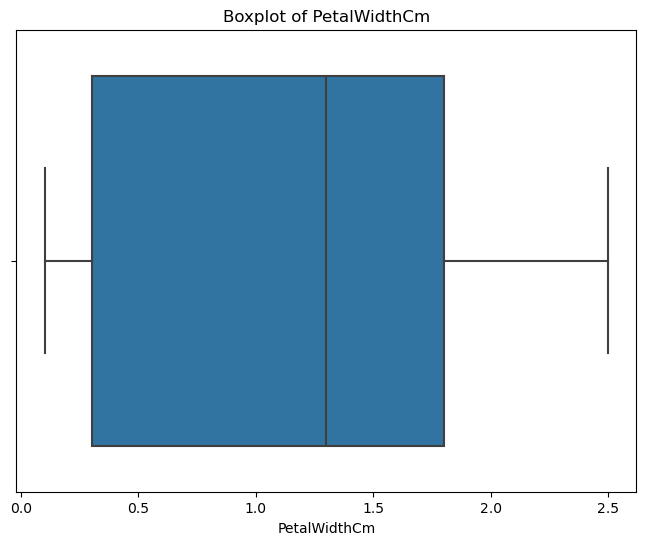

In [45]:
num = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

for i, col in enumerate(num):
    plt.figure(figsize=(8, 6))  
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

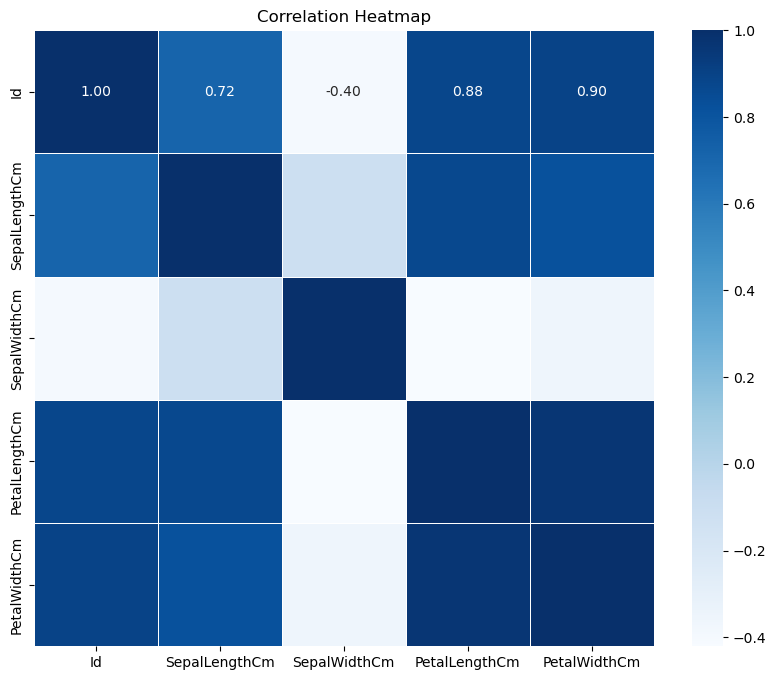

In [53]:
# Select only numerical columns for correlation calculation
numerical_cols = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr = numerical_cols.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

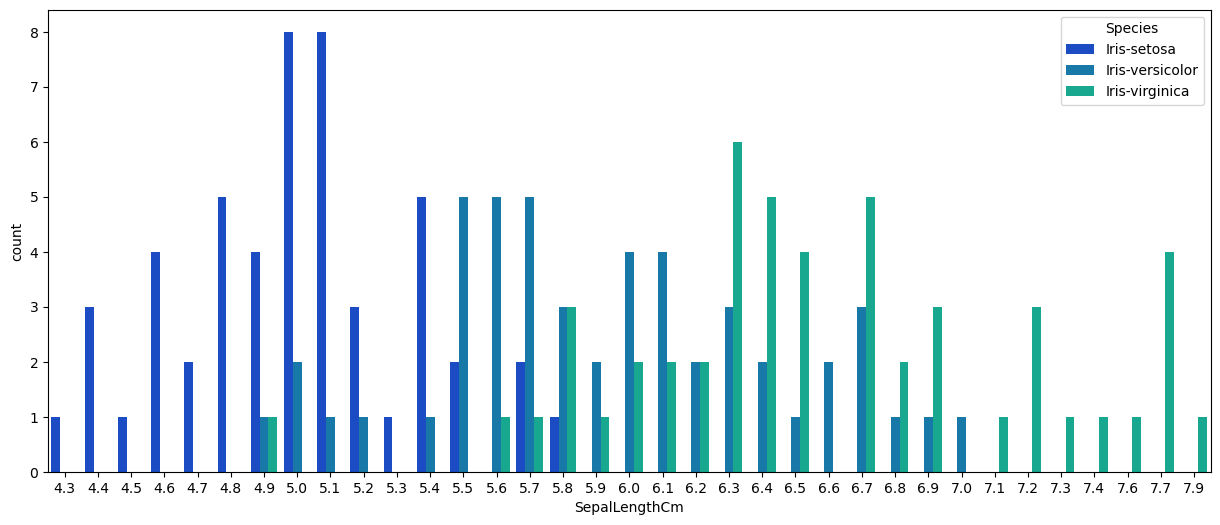

In [51]:
#lets visualize differ columns wrt species
plt.figure(figsize =(15,6))
sns.countplot(x='SepalLengthCm', data=df, hue= df['Species'], palette= 'winter')
plt.show()

## **Data preparation for modelling**

#### Splitting the Train and Test sets

In [55]:
x= df.drop(columns='Species')
y= df['Species']

In [56]:
x.shape
     

(150, 5)

In [57]:
y.shape

(150,)

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=47)

In [60]:
x_train.shape,x_test.shape

((120, 5), (30, 5))

## **Training Models using the above data**

### a) <u>LogisticRegression</u>


In [83]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [65]:
lr_y_pred = lr.predict(x_test)
lr_y_pred

array(['Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa'],
      dtype=object)

In [70]:
lr_results = confusion_matrix(y_test,lr_y_pred)
print("confusion matrix: ")
print(lr_results)
print(accuracy_score(y_test,y_pred))

confusion matrix: 
[[11  0  0]
 [ 0  7  0]
 [ 0  0 12]]
1.0


#### Cross validation score

In [72]:
from sklearn.model_selection import GridSearchCV, cross_val_score
lg_cv=cross_val_score(model_lg,x,y,scoring='accuracy', cv = 3).mean()
print('cv score :',lg_cv)

cv score : 0.86


### b) <u>DecisionTreeClassifier</u>

In [78]:
from sklearn.tree import DecisionTreeClassifier
# creating model
model_dt = DecisionTreeClassifier()
# feeding the training set into the model
model_dt.fit(x_train, y_train)
# predicting the results for the test set
y_pred = model_dt.predict(x_test)
# calculating the training and testing accuracies
print("Training accuracy :", model_dt.score(x_train, y_train))
print("Testing accuracy :", model_dt.score(x_test, y_test))

Training accuracy : 1.0
Testing accuracy : 1.0


In [79]:
# classification report
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00         7
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [80]:
# confusion matrix
print(confusion_matrix(y_test, y_pred))
print('accuracy_score :' ,accuracy_score(y_test,y_pred))

[[11  0  0]
 [ 0  7  0]
 [ 0  0 12]]
accuracy_score : 1.0


#### Cross validation score

In [81]:
dt_cv = cross_val_score(estimator = model_dt, X = x_train, y = y_train, cv = 10)
dt_cv.mean()

1.0

### c) <u>RandomForestClassifier</u>

In [85]:
# creating the model
model_rfc=RandomForestClassifier(n_estimators=400)
# feeding the training set into the model
model_rfc.fit(x_train,y_train)
# predicting the results for the test set
y_pred=model_rfc.predict(x_test)
# calculating the training and testing accuracies
print('Training accuracy :',model_rfc.score(x_train,y_train))
print('testing accuracy :',model_rfc.score(x_test,y_test))

Training accuracy : 1.0
testing accuracy : 1.0


In [87]:
# classification report
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00         7
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [88]:
#confusion matrix
print(confusion_matrix(y_test,y_pred))
print('accuracy_score :' ,accuracy_score(y_test,y_pred))

[[11  0  0]
 [ 0  7  0]
 [ 0  0 12]]
accuracy_score : 1.0


#### Cross validation score

In [89]:
from sklearn.model_selection import GridSearchCV, cross_val_score
rfc_cv=cross_val_score(model_rfc,x,y,scoring='accuracy', cv = 10).mean()
print('cv score :',rfc_cv)

cv score : 0.9933333333333334


### d) <u>SVC</u>

In [91]:
# creating the model
model_svc = SVC()
# feeding the training set into the model
model_svc.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model_svc.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model_svc.score(x_train, y_train))
print("Testing accuracy :", model_svc.score(x_test, y_test))

Training accuracy : 1.0
Testing accuracy : 0.9666666666666667


In [92]:
# classification report
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.86      0.92         7
 Iris-virginica       0.92      1.00      0.96        12

       accuracy                           0.97        30
      macro avg       0.97      0.95      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [93]:
# confusion matrix
print(confusion_matrix(y_test, y_pred))
print('accuracy_score :' ,accuracy_score(y_test,y_pred))

[[11  0  0]
 [ 0  6  1]
 [ 0  0 12]]
accuracy_score : 0.9666666666666667


#### Cross validation score

In [94]:
from sklearn.model_selection import GridSearchCV, cross_val_score
svc_cv=cross_val_score(model_svc,x,y,scoring='accuracy', cv = 10).mean()
print('cv score :',svc_cv)

cv score : 0.9466666666666667


### e) <u>GaussianNB</u>

In [97]:
# creating model
model_gnb = GaussianNB()

# feeding the training set into the model
model_gnb.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model_gnb.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model_gnb.score(x_train, y_train))
print("Testing accuracy :", model_gnb.score(x_test, y_test))

Training accuracy : 0.9916666666666667
Testing accuracy : 1.0


In [98]:
# classification report
print(classification_report(y_test, y_pred))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00         7
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [99]:
# confusion matrix
print(confusion_matrix(y_test, y_pred))
print('accuracy_score :' ,accuracy_score(y_test,y_pred))

[[11  0  0]
 [ 0  7  0]
 [ 0  0 12]]
accuracy_score : 1.0


#### Cross validation score

In [100]:
gnb_cv = cross_val_score(estimator = model_gnb, X = x_train, y = y_train, cv = 10)
gnb_cv.mean()

0.9916666666666666

### f) <u>KNeighborsClassifier</u>

In [102]:
# creating model
model_KNc = KNeighborsClassifier(n_neighbors=7)

# feeding the training set into the model
model_KNc.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model_KNc.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model_KNc.score(x_train, y_train))
print("Testing accuracy :", model_KNc.score(x_test, y_test))

Training accuracy : 1.0
Testing accuracy : 0.9666666666666667


In [103]:
# classification report
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.86      0.92         7
 Iris-virginica       0.92      1.00      0.96        12

       accuracy                           0.97        30
      macro avg       0.97      0.95      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [104]:
# confusion matrix
print(confusion_matrix(y_test, y_pred))
print('accuracy_score :' ,accuracy_score(y_test,y_pred))

[[11  0  0]
 [ 0  6  1]
 [ 0  0 12]]
accuracy_score : 0.9666666666666667


#### Cross validation score

In [105]:
knn_cv=cross_val_score(model_KNc,x,y,scoring='accuracy', cv = 10)
knn_cv.mean()

0.9466666666666667

## Model Performance Comparison

In [109]:
# Define the models and their CV scores
models = [
    ('Logistic Regression', model_lg, lg_cv),
    ('Decision Tree', model_dt, dt_cv),
    ('Random Forest', model_rfc, rfc_cv),
    ('SVC', model_svc, svc_cv),
    ('Gaussian Naive Bayes', model_gnb, gnb_cv),
    ('KNeighbors Classifier', model_KNc, knn_cv)
]

# Print the table
print('MODEL', '                     ', 'Accuracy Score', '      ', 'CV Score', '       ', 'Difference')
for name, model, cv_scores in models:
    accuracy_score = model.score(x_test, y_test)
    cv_mean_score = cv_scores.mean()
    difference = accuracy_score - cv_mean_score
    print(f"{name:<22}", f"{accuracy_score:.6f}            ", f"{cv_mean_score:.6f}         ", f"{difference:.6f}")

MODEL                       Accuracy Score        CV Score         Difference
Logistic Regression    1.000000             0.860000          0.140000
Decision Tree          1.000000             1.000000          0.000000
Random Forest          1.000000             0.993333          0.006667
SVC                    0.966667             0.946667          0.020000
Gaussian Naive Bayes   1.000000             0.991667          0.008333
KNeighbors Classifier  0.966667             0.946667          0.020000


In [110]:
# Define model names and scores
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVC', 'Gaussian Naive Bayes', 'KNeighbors Classifier']
accuracy_scores = [model_lg.score(x_test, y_test), model_dt.score(x_test, y_test), model_rfc.score(x_test, y_test), 
                   model_svc.score(x_test, y_test), model_gnb.score(x_test, y_test), model_KNc.score(x_test, y_test)]
cv_scores_mean = [lg_cv.mean(), dt_cv.mean(), rfc_cv.mean(), svc_cv.mean(), gnb_cv.mean(), knn_cv.mean()]


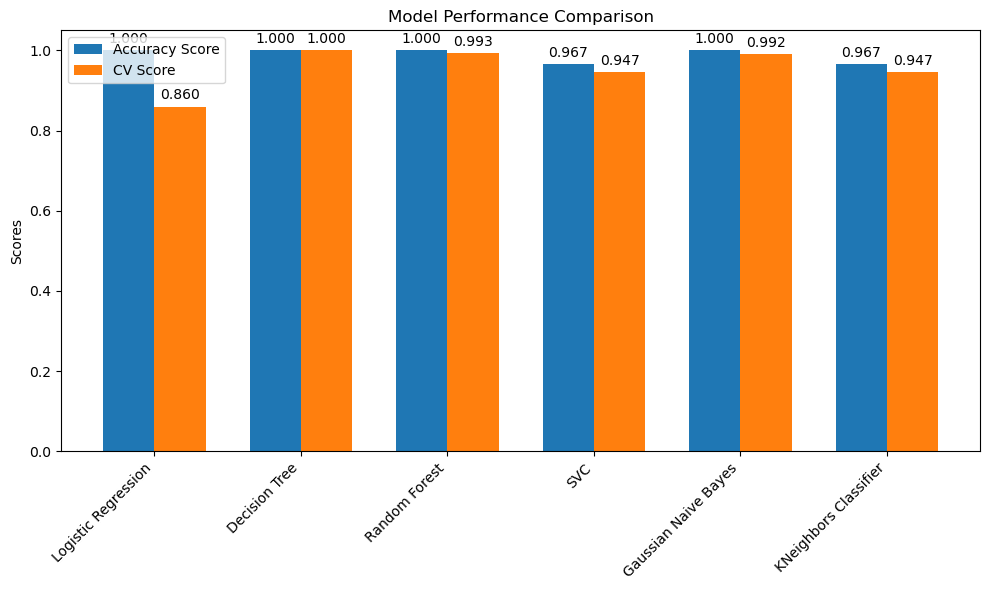

In [111]:
x = np.arange(len(model_names))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, accuracy_scores, width, label='Accuracy Score')
rects2 = ax.bar(x + width/2, cv_scores_mean, width, label='CV Score')

# Add labels, title, and customize axes
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45, ha='right')
ax.legend()

# Add value labels on top of bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


In [112]:
# Assuming accuracy_scores and cv_scores_mean are already defined as lists

# Calculate the differences between accuracy score and CV score for each model
differences = [accuracy_scores[i] - cv_scores_mean[i] for i in range(len(model_names))]

# Find the index of the model with the smallest difference
best_model_index = np.argmin(np.abs(differences))

# Print the best model name
best_model = model_names[best_model_index]
print(f"The best model based on accuracy score - CV score is: {best_model}")


The best model based on accuracy score - CV score is: Decision Tree


## Conclusion

Based on our evaluation of several machine learning models using the Iris dataset, the Decision Tree model demonstrated the best performance in terms of accuracy score compared to cross-validation score. It achieved a perfect accuracy score of 1.000 on the test set and showed no difference from its cross-validation mean score of 1.000, indicating robust generalization.

Logistic Regression, Random Forest, SVC, Gaussian Naive Bayes, and K-Nearest Neighbors also performed well, achieving high accuracy scores close to 1.000. However, they exhibited slight differences between their accuracy and cross-validation scores, suggesting varying degrees of model stability and generalization.